# Aplicação no Mercado Financeiro de empresas de tecnologia

Nessa atividade, faremos uma análise de uma carteira de ações das empresas de tecnologia mais importantes, comparando-as com o índice NASDAQ.

As empresas que serão analisadas são as que compõem o FAANG (Facebook, Amazon, Apple, Netflix e Google), juntamente com a Tesla e o índice NASDAQ, para comparação. Esses são os identificadores das empresas:
* Meta (antigo Facebook) - META
* Amazon - AMZN
* Apple - AAPL
* Netflix - NFLX
* Google - GOOGL
* Tesla - TSLA
* NASDAQ - ^NDX

## Setup do ambiente (preparação das bibliotecas)

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from scipy import stats
from scipy import optimize

pio.renderers.default = 'notebook_connected'

## Construindo a base de dados com as ações selecionadas

Faremos uma lista das ações que queremos verificar na carteira e buscaremos as informações no Yahoo Finance, utilizando a biblioteca do Panda Datareader para isso.

In [8]:
acoes = ['META','AMZN', 'AAPL', 'NFLX', 'GOOGL', 'TSLA', '^NDX']
print('Ações que serão pesquisadas:')
acoes

Ações que serão pesquisadas:


['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL', 'TSLA', '^NDX']

In [9]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao,
                                     data_source='yahoo', start='2015-01-01')['Close']

O resultado da pesquisa pode ser verificado abaixo:

In [10]:
acoes_df

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
Date,,,,,,,
2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...
2022-07-21,183.169998,124.629997,155.350006,223.880005,114.339996,815.119995,12619.410156
2022-07-22,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156


Será necessário incluir um índice independente na lista, pois a pesquisa coloca como chave de cada registro a data. É possível fazer isso utilizando a função `reset_index` do `DataFrame`. Ao utilizarmos o argumento `inplace=True`, nós garantimos que não há nenhuma perda de dados.

In [11]:
acoes_df.reset_index(inplace=True)
acoes_df

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...,...
1900,2022-07-21,183.169998,124.629997,155.350006,223.880005,114.339996,815.119995,12619.410156
1901,2022-07-22,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391


## Visualização dos Dados

A Biblioteca Ploty, do Python, nos permite visualizar, de forma gráfica, os dados que recuperamos. Vamos ver o histórico de preços das ações no decorrer do tempo:

In [12]:
figuraHistorico = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figuraHistorico.add_scatter(x = acoes_df["Date"] ,y = acoes_df[i], name = i)
figuraHistorico.show()

Podemos observar que o gráfico mostra o abalo geral que aconteceu em março de 2020, devido à pandemia do Coronavírus, assim como a desvalorização recorde da META em fevereiro de 2022, por conta do balanço em que relatou um declínio de usuários ativos em comparação com rivais como o TikTok. A perda de valor de mercado do Netflix também se destaca, em um movimento que começou no final de 2021 e que levou a um recente rebaixamento dos papeis da empresa.

## Taxa de Retorno de Ações

Um dos indicadores que vamos analisar é a taxa de retorno das ações da carteira. Ela basicamente se define como a razão entre o valor atual e o valor anterior. Com os dados que temos, podemos acompanhar a evolução da taxa de retorno comparando o valor de fechamento de um dia com o valor do fechamento do dia anterior. Como há um intervalo de tempo entre esses dois pontos, essa diferença é abrupta, e é possível suavizá-la com o uso do `log`.

A expressão da Valor Esperado da taxa de retorno pode ser descrita assim:

$$ \mathbb{E} [ R_i] = log \left( \frac{P_t}{P_{t-1}} \right) $$

Como temos os dados variando no tempo, é possível fazer esse cálculo para cada registro. Felizmente não será necessário fazer a iteração manual dos dados, pois a  biblioteca `NumPy` tem, através da função `log`, a capacidade de fazer a operação utilizando dois `DataFrame`s, utilizando como argumento os de mesmo índice.

Já temos o `DataFrame` com os dados originais, e só nos falta montar outro com os dados do dia anterior, com o mesmo índice dos dados originais, para poder fazer o cálculo. O artifício que vamos usar para isso é a função `shift` do `DataFrame`. Essa função adiciona uma quantidade de registros no topo do `DataFrame`. Aplicando isso no nosso conjunto de dados, conseguiremos uma cópia dos dados do dia anterior, alinhados com o índice dos nossos dados originais.

O primeiro passo é copiar o `DataFrame` das ações:

In [13]:
dataset = acoes_df.copy()
dataset

,Date,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,2015-01-02,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,2015-01-05,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,2015-01-06,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,2015-01-07,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,2015-01-08,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...,...
1900,2022-07-21,183.169998,124.629997,155.350006,223.880005,114.339996,815.119995,12619.410156
1901,2022-07-22,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
1902,2022-07-25,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,2022-07-26,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391


Com a cópia, vamos retirar a coluna `Date`, pois ela não será usada no cálculo: 

In [14]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
1,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
2,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
3,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
4,78.180000,15.023000,27.972500,47.779999,25.345501,42.124001,4240.549805
...,...,...,...,...,...,...,...
1900,183.169998,124.629997,155.350006,223.880005,114.339996,815.119995,12619.410156
1901,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
1902,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156
1903,159.149994,114.809998,151.600006,213.910004,105.019997,776.580017,12086.900391


Realizamos o `shift` para verificar o funcionamento e constatar que a primeira linha foi deslocada:

In [15]:
dataset.shift(1)

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78.449997,15.426000,27.332500,49.848572,26.477501,43.862000,4230.240234
2,77.190002,15.109500,26.562500,47.311428,25.973000,42.018002,4160.959961
3,76.150002,14.764500,26.565001,46.501431,25.332001,42.256001,4110.830078
4,76.150002,14.921000,26.937500,46.742859,25.257500,42.189999,4160.000000
...,...,...,...,...,...,...,...
1900,183.089996,122.769997,153.039993,216.440002,113.900002,742.500000,12439.679688
1901,183.169998,124.629997,155.350006,223.880005,114.339996,815.119995,12619.410156
1902,169.270004,122.419998,154.089996,220.440002,107.900002,816.729980,12396.469727
1903,166.649994,121.139999,152.949997,218.509995,107.510002,805.299988,12328.410156


O resultado das taxas de retorno pode ser visto abaixo:

In [16]:
taxas_retorno = np.log(dataset / dataset.shift(1))
taxas_retorno

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016191,-0.020731,-0.028576,-0.052238,-0.019238,-0.042950,-0.016513
2,-0.013565,-0.023098,0.000094,-0.017269,-0.024989,0.005648,-0.012121
3,0.000000,0.010544,0.013925,0.005178,-0.002945,-0.001563,0.011890
4,0.026309,0.006813,0.037703,0.021946,0.003478,-0.001566,0.019178
...,...,...,...,...,...,...,...
1900,0.000437,0.015037,0.014981,0.033797,0.003856,0.093312,0.014345
1901,-0.078920,-0.017892,-0.008144,-0.015485,-0.057972,0.001973,-0.017824
1902,-0.015599,-0.010511,-0.007426,-0.008794,-0.003621,-0.014094,-0.005505
1903,-0.046049,-0.053668,-0.008866,-0.021276,-0.023433,-0.036315,-0.019784


A função `describe` do `DataFrame` pode nos proporcionar várias informações estatísticas importantes sobre as taxas de retorno:

In [17]:
taxas_retorno.describe()

,META,AMZN,AAPL,NFLX,GOOGL,TSLA,^NDX
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,0.000405,0.001082,0.000917,0.000796,0.000762,0.001541,0.000573
std,0.022586,0.020290,0.018610,0.028934,0.017382,0.035493,0.014173
min,-0.306391,-0.151398,-0.137708,-0.432578,-0.123685,-0.236518,-0.130032
25%,-0.008767,-0.008106,-0.007294,-0.011684,-0.006641,-0.014790,-0.004770
50%,0.000952,0.001302,0.000895,0.000356,0.001188,0.001280,0.001231
75%,0.011729,0.010821,0.010293,0.014535,0.009169,0.018781,0.007584
max,0.162064,0.132178,0.113157,0.174189,0.150645,0.181445,0.095966


In [273]:
medias = (taxas_retorno[acoes].sum()/len(taxas_retorno[acoes]))*100
medias

BBAS3.SA    0.023800
BRFS3.SA   -0.071244
CIEL3.SA   -0.090876
PETR3.SA    0.070520
MGLU3.SA    0.130683
^BVSP       0.035291
dtype: float64

In [274]:
taxas_retorno.mean()*100

BBAS3.SA    0.023813
BRFS3.SA   -0.071282
CIEL3.SA   -0.090924
PETR3.SA    0.070558
MGLU3.SA    0.130753
^BVSP       0.035613
dtype: float64

In [275]:
vars_acoes = ((taxas_retorno[acoes] - taxas_retorno.mean()) ** 2).sum() / (len(taxas_retorno[acoes]) - 1)
vars_acoes

BBAS3.SA    0.000783
BRFS3.SA    0.000690
CIEL3.SA    0.000828
PETR3.SA    0.001068
MGLU3.SA    0.001673
^BVSP       0.000267
dtype: float64

In [276]:
taxas_retorno.var()

BBAS3.SA    0.000783
BRFS3.SA    0.000690
CIEL3.SA    0.000829
PETR3.SA    0.001069
MGLU3.SA    0.001673
^BVSP       0.000269
dtype: float64

In [277]:
taxas_retorno.std()*100

BBAS3.SA    2.798597
BRFS3.SA    2.627334
CIEL3.SA    2.878985
PETR3.SA    3.269482
MGLU3.SA    4.090773
^BVSP       1.640383
dtype: float64

In [278]:
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
date

,Date
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
1876,2022-07-21
1877,2022-07-22
1878,2022-07-25
1879,2022-07-26


In [279]:
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.020969,-0.019160,-0.034579,-0.084590,0.018618,-0.020724
2,2015-01-06,0.013880,0.008976,-0.020272,-0.025721,-0.013263,0.010134
3,2015-01-07,0.043078,0.043710,0.009265,0.047253,0.032835,0.030003
4,2015-01-08,0.003401,-0.018047,0.027292,0.065278,-0.007782,0.009657
...,...,...,...,...,...,...,...
1876,2022-07-21,0.006899,0.025051,0.004866,-0.011019,-0.019737,0.007561
1877,2022-07-22,-0.006899,0.045187,-0.009756,0.010705,-0.051118,-0.001091
1878,2022-07-25,0.015171,0.014211,0.004890,0.042312,-0.024780,0.013505
1879,2022-07-26,0.003403,-0.000614,0.009709,0.014307,-0.066691,-0.004979


In [280]:
figuraHistoricoRetorno = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno_date.columns[1:]:
  figuraHistoricoRetorno.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[i], name = i)
figuraHistoricoRetorno.show()

In [281]:
taxas_retorno.cov()

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
BBAS3.SA,0.000783,0.000242,0.000324,0.000560,0.000420,0.000369
BRFS3.SA,0.000242,0.000690,0.000180,0.000278,0.000281,0.000211
CIEL3.SA,0.000324,0.000180,0.000829,0.000300,0.000297,0.000241
PETR3.SA,0.000560,0.000278,0.000300,0.001069,0.000384,0.000412
MGLU3.SA,0.000420,0.000281,0.000297,0.000384,0.001673,0.000324
^BVSP,0.000369,0.000211,0.000241,0.000412,0.000324,0.000269


In [282]:
taxas_retorno.corr()

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
BBAS3.SA,1.000000,0.329626,0.402365,0.612478,0.367066,0.800892
BRFS3.SA,0.329626,1.000000,0.238072,0.324065,0.261685,0.488350
CIEL3.SA,0.402365,0.238072,1.000000,0.318900,0.251971,0.508822
PETR3.SA,0.612478,0.324065,0.318900,1.000000,0.287313,0.765503
MGLU3.SA,0.367066,0.261685,0.251971,0.287313,1.000000,0.481674
^BVSP,0.800892,0.488350,0.508822,0.765503,0.481674,1.000000


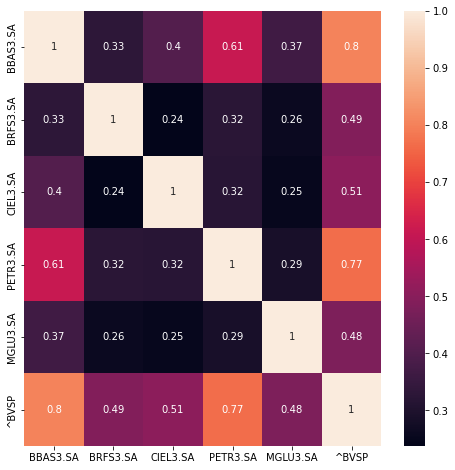

In [283]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

#### Montando uma Carteira de Ativos

In [284]:
taxas_retorno_date["CARTEIRA"] = (taxas_retorno_date["BBAS3.SA"] + taxas_retorno_date["BRFS3.SA"] + 
                                   taxas_retorno_date["CIEL3.SA"] + taxas_retorno_date["PETR3.SA"] + 
                                   taxas_retorno_date["MGLU3.SA"])/5
taxas_retorno_date

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP,CARTEIRA
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.020969,-0.019160,-0.034579,-0.084590,0.018618,-0.020724,-0.028136
2,2015-01-06,0.013880,0.008976,-0.020272,-0.025721,-0.013263,0.010134,-0.007280
3,2015-01-07,0.043078,0.043710,0.009265,0.047253,0.032835,0.030003,0.035228
4,2015-01-08,0.003401,-0.018047,0.027292,0.065278,-0.007782,0.009657,0.014029
...,...,...,...,...,...,...,...,...
1876,2022-07-21,0.006899,0.025051,0.004866,-0.011019,-0.019737,0.007561,0.001212
1877,2022-07-22,-0.006899,0.045187,-0.009756,0.010705,-0.051118,-0.001091,-0.002376
1878,2022-07-25,0.015171,0.014211,0.004890,0.042312,-0.024780,0.013505,0.010361
1879,2022-07-26,0.003403,-0.000614,0.009709,0.014307,-0.066691,-0.004979,-0.007977


In [285]:
taxas_retorno_port = taxas_retorno_date.filter(["Date", "CARTEIRA", "^BVSP"])
taxas_retorno_port

,Date,CARTEIRA,^BVSP
0,2015-01-02,NaN,NaN
1,2015-01-05,-0.028136,-0.020724
2,2015-01-06,-0.007280,0.010134
3,2015-01-07,0.035228,0.030003
4,2015-01-08,0.014029,0.009657
...,...,...,...
1876,2022-07-21,0.001212,0.007561
1877,2022-07-22,-0.002376,-0.001091
1878,2022-07-25,0.010361,0.013505
1879,2022-07-26,-0.007977,-0.004979


In [286]:
figuraComparacao = px.line(title = 'Comparação de retorno Carteira x Ibovespa')
for i in taxas_retorno_port.columns[1:]:
  figuraComparacao.add_scatter(x = taxas_retorno_port["Date"] ,y = taxas_retorno_port[i], name = i)
figuraComparacao.add_hline(y = taxas_retorno_port['CARTEIRA'].mean(), line_color="green", line_dash="dot", )
figuraComparacao.show()

In [287]:
taxas_retorno_port_corr = taxas_retorno_date.filter(["CARTEIRA", "^BVSP"])
taxas_retorno_port_corr

,CARTEIRA,^BVSP
0,NaN,NaN
1,-0.028136,-0.020724
2,-0.007280,0.010134
3,0.035228,0.030003
4,0.014029,0.009657
...,...,...
1876,0.001212,0.007561
1877,-0.002376,-0.001091
1878,0.010361,0.013505
1879,-0.007977,-0.004979


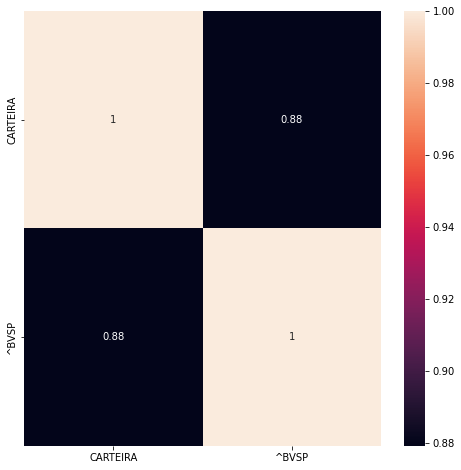

In [288]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno_port_corr.corr(), annot=True);

#### Alocação Aleatória de Ativos - Portfólio Markowitz

In [289]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000
...,...,...,...,...,...,...
1876,2022-07-21,34.910000,15.360000,4.120000,31.590000,3.010000
1877,2022-07-22,34.669998,16.070000,4.080000,31.930000,2.860000
1878,2022-07-25,35.200001,16.299999,4.100000,33.310001,2.790000
1879,2022-07-26,35.320000,16.290001,4.140000,33.790001,2.610000


In [290]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [291]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 10)

C:\Users\demet\AppData\Local\Temp\ipykernel_7568\2210113608.py:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [292]:
dataset

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,soma valor,taxa retorno
0,2885.564869,77.634505,2370.522690,2801.328081,1864.949855,10000.000000,0.000000
1,2825.687892,76.161222,2289.953564,2574.109390,1899.995934,9665.908002,-3.398004
2,2865.181207,76.847920,2243.999263,2508.745056,1874.963020,9569.736468,-0.999939
3,2991.305208,80.281423,2264.887635,2630.135750,1937.549303,9904.159319,3.434913
4,3001.497039,78.845594,2327.552555,2807.553397,1922.529555,10137.978140,2.333378
...,...,...,...,...,...,...,...
1876,4447.464496,19.177645,424.889332,9832.661612,24111.725299,38835.918384,-1.422680
1877,4416.888760,20.064112,420.764197,9938.489609,22910.143536,37706.350213,-2.951703
1878,4484.410036,20.351276,422.826764,10368.026914,22349.406271,37645.021261,-0.162781
1879,4499.697661,20.338793,426.951900,10517.430936,20907.508538,36371.927827,-3.440344


In [293]:
acoes_pesos

,Ações,Pesos
0,BBAS3.SA,0.288556
1,BRFS3.SA,0.007763
2,CIEL3.SA,0.237052
3,PETR3.SA,0.280133
4,MGLU3.SA,0.186495


In [294]:
datas

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1876   2022-07-21
1877   2022-07-22
1878   2022-07-25
1879   2022-07-26
1880   2022-07-27
Name: Date, Length: 1881, dtype: datetime64[ns]

In [295]:
soma_valor

37307.77671134846

In [296]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

In [297]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [298]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.show()

#### Mais estatísticas sobre o portfólio aleatório

In [299]:
# Retorno
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

2.7307776711348457

In [300]:
# Desvio-Padrão
dataset['taxa retorno'].std()

2.9364339644677773

In [301]:
# Sharpe Ratio
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std())

0.023836930270786837

In [302]:
dinheiro_total = 10000
soma_valor - dinheiro_total

27307.77671134846

## Simulação da Fronteira Eficiente

In [303]:
acoes_port

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000
...,...,...,...,...,...,...
1876,2022-07-21,34.910000,15.360000,4.120000,31.590000,3.010000
1877,2022-07-22,34.669998,16.070000,4.080000,31.930000,2.860000
1878,2022-07-25,35.200001,16.299999,4.100000,33.310001,2.790000
1879,2022-07-26,35.320000,16.290001,4.140000,33.790001,2.610000


In [304]:
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
log_ret

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,NaN,NaN,NaN,NaN,NaN
1,-0.020969,-0.019160,-0.034579,-0.084590,0.018618
2,0.013880,0.008976,-0.020272,-0.025721,-0.013263
3,0.043078,0.043710,0.009265,0.047253,0.032835
4,0.003401,-0.018047,0.027292,0.065278,-0.007782
...,...,...,...,...,...
1876,0.006899,0.025051,0.004866,-0.011019,-0.019737
1877,-0.006899,0.045187,-0.009756,0.010705,-0.051118
1878,0.015171,0.014211,0.004890,0.042312,-0.024780
1879,0.003403,-0.000614,0.009709,0.014307,-0.066691


In [305]:
np.random.seed(42)
num_ports = 1000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [306]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.029296358404282585
Local do Max Sharpe Ratio: 643


In [307]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[643,:])

[0.06771511 0.09521168 0.00114756 0.41402801 0.42189764]


In [308]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print(max_sr_ret)
print(max_sr_vol)

0.000790985444815685
0.026999445934551974


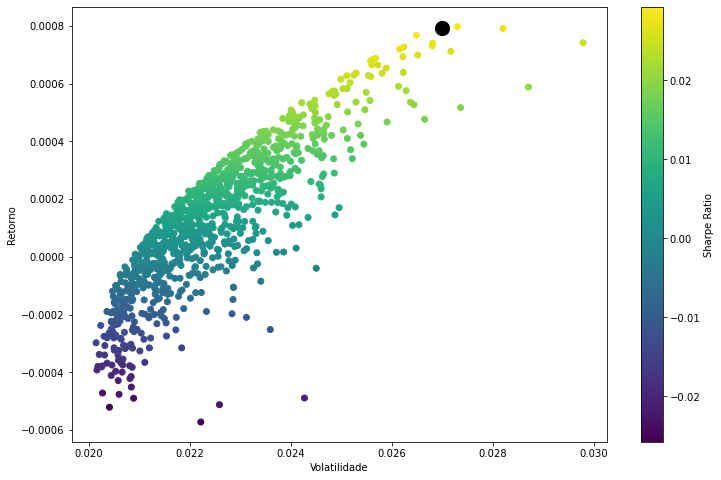

In [309]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200) # black dot
plt.show()

Nós podemos ver no gráfico assima o conjunto de portfólios simulados, pois o peso $w_i$ de cada ativo foi simulado e criamos um conjunto de $n = 1000$ carteiras e escolhemos no ponto vermelho a que tem maior **Sharpe Ratio**, que é a razão retorno sobre a volatilidade. Esse dado nos da uma noção do portfólio ponderado pelo risco.

In [310]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [311]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [312]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

     fun: -0.03447436247307403
     jac: array([ 0.00863422,  0.03211754,  0.03892602, -0.00067042,  0.00037292])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.38777878e-17, 3.81639165e-17, 0.00000000e+00, 3.57427494e-01,
       6.42572506e-01])


In [313]:
frontier_y = np.linspace(-0.0006, 0.0008, 200)

In [314]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [315]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

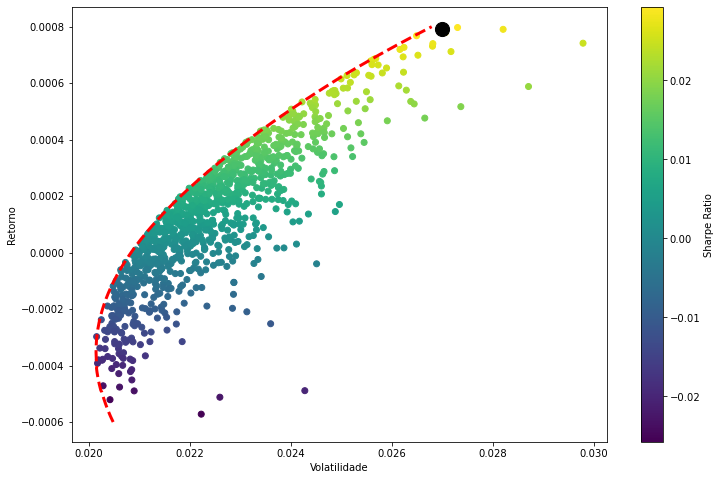

In [316]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200)
# plt.savefig('cover.png')
plt.show()